# Common Functions

In [1]:
def plotFlowSheet(graph):
    from Flowsheet_Class.flowsheet import Flowsheet
    flowsheet =Flowsheet()
    flowsheet.state=graph
    flowsheet.visualize_flowsheet(table=False, pfd_path="plots/flowsheet1", plot_with_stream_labels=False)

def sfiles_generate_validate(graph):
    from Flowsheet_Class.flowsheet import Flowsheet
    flowsheet =Flowsheet()
    flowsheet.state=graph
    flowsheet.convert_to_sfiles(version="v2")
    sfiles_1 = flowsheet.sfiles
    print(f"SFILE : {sfiles_1}")
    flowsheet.create_from_sfiles(sfiles_1, overwrite_nx=True)
    flowsheet.convert_to_sfiles(version="v2")
    sfiles_2 = flowsheet.sfiles
    print("Conversion from SFILES to graph and back to SFILES successful!\n" if sfiles_1 == sfiles_2
        else "Error encountered during conversion!")


# 3. Control of Heat Exchanger

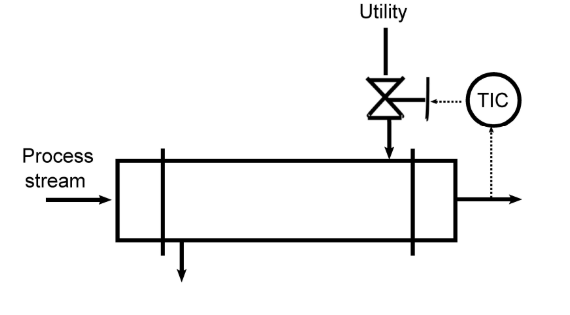

In [2]:
from IPython.display import Image
Image(filename = "images/heat_exchanger.png")

## PFD

In [3]:
import networkx as nx
graph_heat_exchanger = nx.DiGraph()
graph_heat_exchanger.add_edges_from([
   ("raw-1","hex-1"),
   ("raw-2","v-1"),
    ("v-1","hex-1"),
    ("hex-1","prod-1"),
    ("hex-1","prod-2"),
    ("raw-2","v-1"),
])


Number of unit operations = 6
Number of controllers = 0
Number of indicators = 0 
Number of transmitters = 0


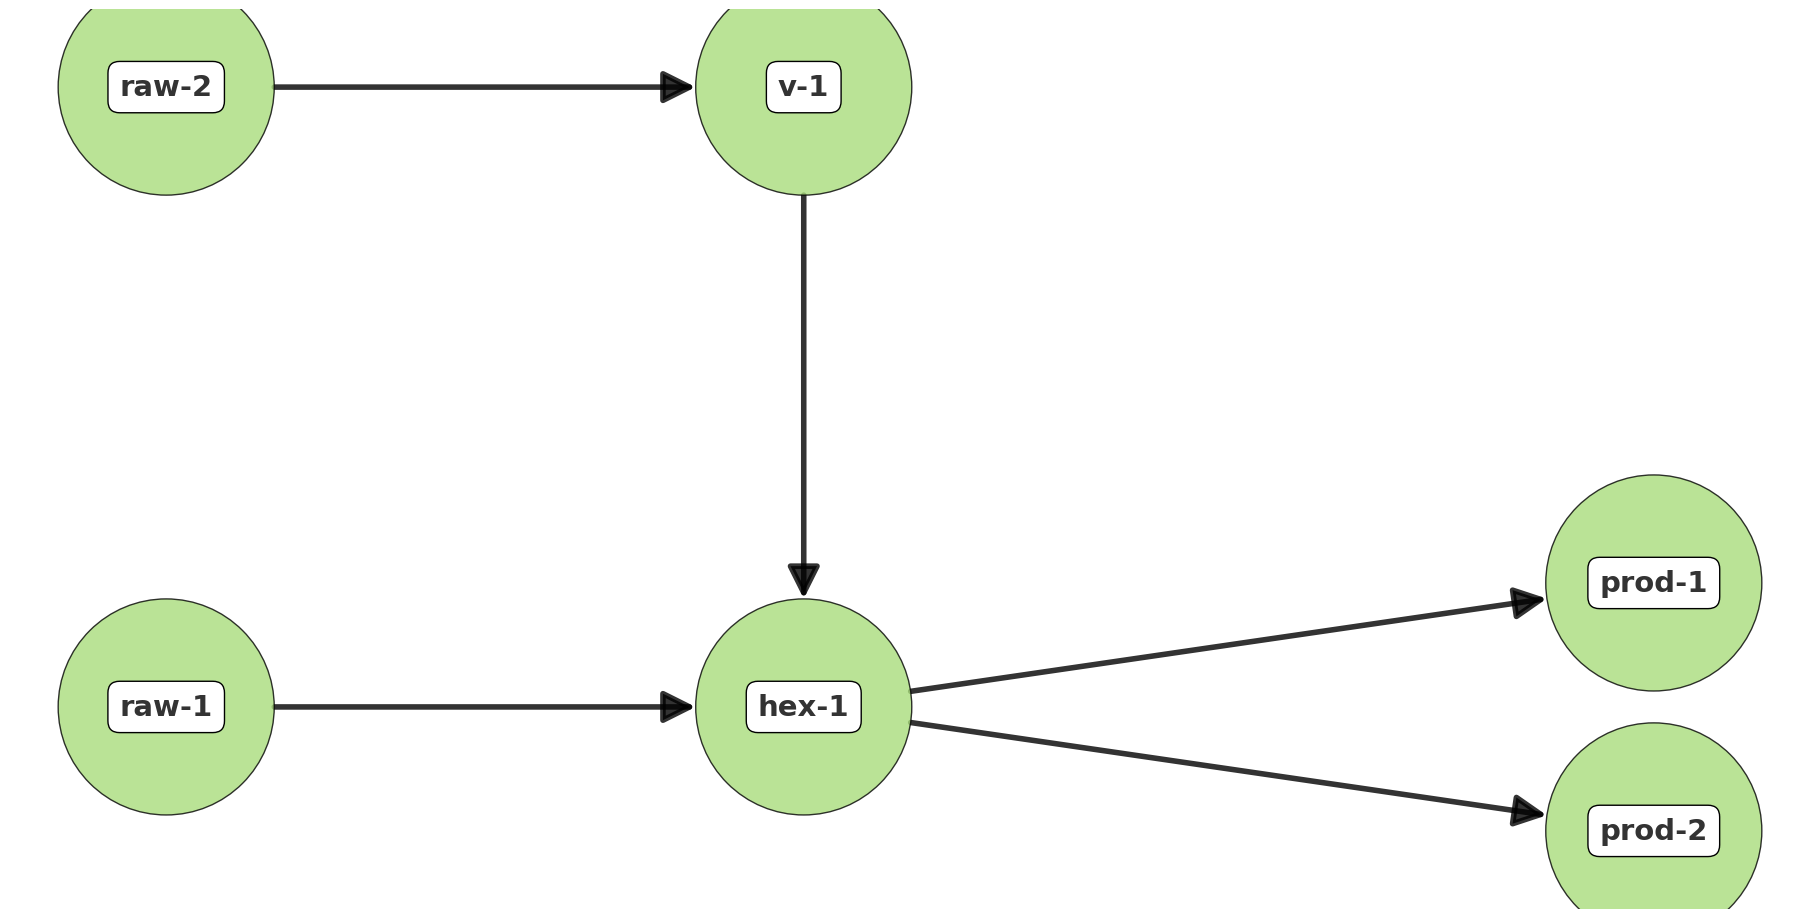

SFILE : (raw)(v)(hex)<&|(raw)&|[(prod)](prod)
Overwriting the current self.sfiles_list
['(raw)', '(v)', '(hex)', '<&|', '(raw)', '&|', '[', '(prod)', ']', '(prod)']
raw
v
hex
raw
prod
prod
Conversion from SFILES to graph and back to SFILES successful!



In [4]:
plotFlowSheet(graph_heat_exchanger)
sfiles_generate_validate(graph_heat_exchanger)

## P&ID

In [5]:
import networkx as nx
graph_heat_exchanger_1 = nx.DiGraph()
graph_heat_exchanger_1.add_edges_from([
   ("raw-1","hex-1"),
   ("raw-2","v-1"),
    ("v-1","hex-1"),
    ("hex-1","C-1/TC"),
    ("C-1/TC","prod-1"),
    ("C-1/TC","v-1",{"tags":{"signal": ["not_next_unitop"]}}),
    ("hex-1","prod-2"),
    ("raw-2","v-1"),
])


Number of unit operations = 6
Number of controllers = 1
Number of indicators = 0 
Number of transmitters = 0


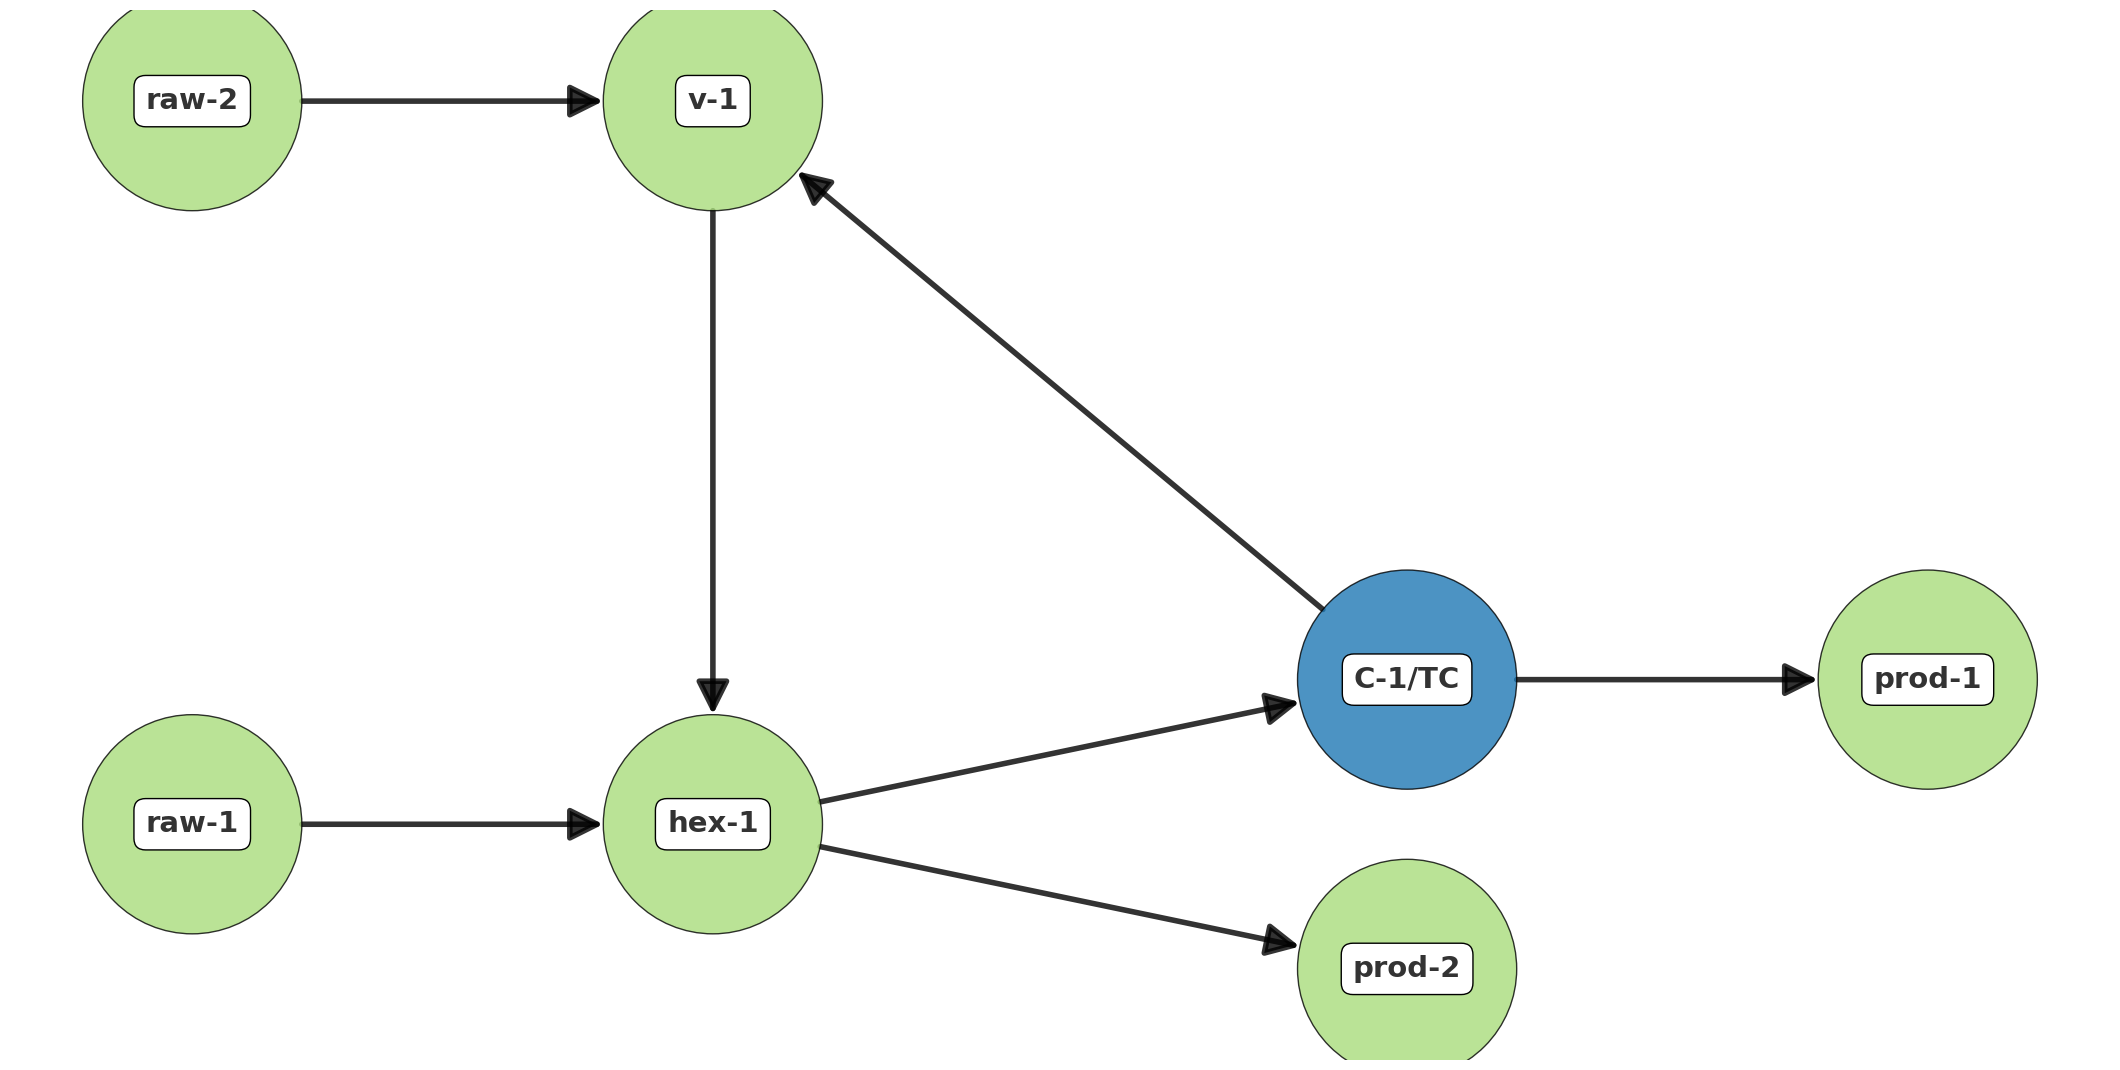

SFILE : (raw)(v)<_1(hex)<&|(raw)&|[(prod)](C){TC}_1(prod)
Overwriting the current self.sfiles_list
['(raw)', '(v)', '<_1', '(hex)', '<&|', '(raw)', '&|', '[', '(prod)', ']', '(C)', '{TC}', '_1', '(prod)']
raw
v
hex
raw
prod
C
prod
Conversion from SFILES to graph and back to SFILES successful!



In [6]:
plotFlowSheet(graph_heat_exchanger_1)
sfiles_generate_validate(graph_heat_exchanger_1)